In [2]:
#------------------------------
# Importing modules
#------------------------------
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from tabulate import tabulate

In [2]:
def SENAMHI_scrapping(id_station, type_station, yrs_start=2000, yrs_end=2019):
    container=[]
    header = ['Dates','Tmean','Tmax','Tmin', 'Humidity', 'Rainfall', 'Presion', 'WV', 'WD']
    URL_senamhi='https://www.senamhi.gob.pe/mapas/mapa-estaciones/'
    URL_base=URL_senamhi+'_dat_esta_tipo02.php?estaciones={}&tipo={}&CBOFiltro='.format(id_station, type_station)
    for yrs in range(yrs_start,yrs_end+1):
        for mnths in range(1,13):
            URL=URL_base+'{}{:02d}&t_e=M'.format(yrs, mnths)
            resp = requests.get(URL)
            soup = BeautifulSoup(resp.content, 'lxml')
            table = soup.find_all('table')[0] 
            df = pd.read_html(str(table))[0]
            df = pd.DataFrame(df.values[2:], columns=header)
            container.append(df)
    result = pd.concat(container)
    result['Date'] = pd.to_datetime(result['Dates'], format='%d-%m-%Y', errors='ignore')
    result.set_index('Date', inplace=True)
    result = result.drop('Dates', 1)
    result = result.convert_objects(convert_numeric=True)
    result = result.sort_index()
    return result

In [21]:
def SENAMHI_stations_scrapping():
    for cod in range(1,2000):
        URL_senamhi='https://www.senamhi.gob.pe/mapas/mapa-estaciones/'
        URL=URL_senamhi+'_dat_esta_tipo.php?estaciones={:06d}'.format(cod)
        dfs = pd.read_html(URL, header=0)
        for df in dfs:
            if 'No hay Datos' not in df.iloc[1,6]:
                station=[y.strip() for x in df.iloc[0,0].split(',') for y in x.split(':')][1]
                [lat, lon, lev, depa, prov, dist]=[df.iloc[2,1], df.iloc[2,3], df.iloc[2,5], \
                                                   df.iloc[1,1], df.iloc[1,3], df.iloc[1,5]]
                print(station, lat, lon, lev, depa, prov, dist)
                resp= requests.get(URL)
                html=resp.content
                soup = BeautifulSoup(html,"lxml")
                nlink = [x for x in soup.find_all('iframe')]
                link = nlink[0].get('src')
                print(link)
            else:
                break
        
        

            
#             if 'PLU' in station:
#                 type_station = 'PLU'
#             else:
#                 type_station = 'METEO'
        
#                 print('Es una pluviometrica')
            #lat=df.iloc[2,1]
            #lat=df.iloc[0,0]
#             print(station)            

In [5]:
URL='https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo.php?estaciones=000478'
dfs = pd.read_html(URL, header=0)
for df in dfs:
    print(df)
    print('hola')

                                          Unnamed: 0  \
0  Estación : PUERTO INCA , Tipo Convencional - M...   
1                                     Departamento :   
2                                          Latitud :   

                                          Unnamed: 1  \
0  Estación : PUERTO INCA , Tipo Convencional - M...   
1                                            HUANUCO   
2                                        9° 22' 53''   

                                          Unnamed: 2  \
0  Estación : PUERTO INCA , Tipo Convencional - M...   
1                                        Provincia :   
2                                         Longitud :   

                                          Unnamed: 3  \
0  Estación : PUERTO INCA , Tipo Convencional - M...   
1                                        PUERTO INCA   
2                                       74° 57' 39''   

                                          Unnamed: 4  \
0  Estación : PUERTO INCA , Tipo Convenciona

In [3]:
URL='https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo.php?estaciones=000478'
resp= requests.get(URL)
html=resp.content
soup = BeautifulSoup(html,"lxml")
#soup.prettify

In [12]:
a = [link for link in soup.find_all('iframe')]
a[0].get('src')

'_dat_esta_tipo02.php?estaciones=000478&tipo=CON&CBOFiltro=201904&t_e=M'

In [5]:
for link in soup.find_all('iframe'):
    #print(link)
    print(link.get('src'))

_dat_esta_tipo02.php?estaciones=000478&tipo=CON&CBOFiltro=201904&t_e=M


In [16]:
df = pd.DataFrame({'a': np.random.randint(3, size=10)})

In [18]:
df['b'] = 5

In [24]:
df.rename(index=str, columns={"a": "a2", "b": "b2", 'c1':'c2'})

,a2,b2
0,2,5
1,0,5
2,0,5
3,2,5
4,1,5
5,0,5
6,1,5
7,0,5
8,2,5
9,1,5


In [21]:
df

,a,b
0,2,5
1,0,5
2,0,5
3,2,5
4,1,5
5,0,5
6,1,5
7,0,5
8,2,5
9,1,5


In [22]:
a = SENAMHI_stations_scrapping()

SANTANDER 11° 5' 1'' 76° 55' 1'' 3630 LIMA HUAURA LEONCIO PRADO
_dat_esta_tipo02.php?estaciones=000007&tipo=CON&CBOFiltro=199109&t_e=M
CHALLACA PLU 13° 47' 31'' 75° 23' 26'' 1880 HUANCAVELICA HUAYTARA SANTIAGO DE CHOCORVOS
_dat_esta_tipo02.php?estaciones=000009&tipo=CON&CBOFiltro=201902&t_e=M
LOS CEDROS 3° 38' 1'' 80° 32' 1'' 74 TUMBES TUMBES CORRALES
_dat_esta_tipo02.php?estaciones=000101&tipo=CON&CBOFiltro=199803&t_e=M
MATAPALO 3° 42' 1'' 80° 13' 1'' 74 TUMBES ZARUMILLA MATAPALO
_dat_esta_tipo02.php?estaciones=000103&tipo=CON&CBOFiltro=199709&t_e=M
GUEPPI 0° 7' 1'' 75° 15' 1'' 191 LORETO PUTUMAYO PUTUMAYO
_dat_esta_tipo02.php?estaciones=000105&tipo=CON&CBOFiltro=198311&t_e=M
EL ESTRECHO 2° 26' 51.6'' 72° 40' 2.9'' 240 LORETO PUTUMAYO PUTUMAYO
_dat_esta_tipo02.php?estaciones=000110&tipo=CON&CBOFiltro=201902&t_e=M
EL CAUCHO 3° 49' 1'' 80° 16' 1'' 438 TUMBES ZARUMILLA MATAPALO
_dat_esta_tipo02.php?estaciones=000128&tipo=CON&CBOFiltro=199611&t_e=M
LOS PINOS 3° 41' 1'' 80° 40' 1'' 72 TUMB

In [20]:
a = SENAMHI_stations_scrapping()

SANTANDER 11° 5' 1'' 76° 55' 1'' 3630 LIMA HUAURA LEONCIO PRADO
_dat_esta_tipo02.php?estaciones=000007&tipo=CON&CBOFiltro=199109&t_e=M
CHALLACA PLU 13° 47' 31'' 75° 23' 26'' 1880 HUANCAVELICA HUAYTARA SANTIAGO DE CHOCORVOS
_dat_esta_tipo02.php?estaciones=000009&tipo=CON&CBOFiltro=201902&t_e=M
LOS CEDROS 3° 38' 1'' 80° 32' 1'' 74 TUMBES TUMBES CORRALES
_dat_esta_tipo02.php?estaciones=000101&tipo=CON&CBOFiltro=199803&t_e=M
MATAPALO 3° 42' 1'' 80° 13' 1'' 74 TUMBES ZARUMILLA MATAPALO
_dat_esta_tipo02.php?estaciones=000103&tipo=CON&CBOFiltro=199709&t_e=M
GUEPPI 0° 7' 1'' 75° 15' 1'' 191 LORETO PUTUMAYO PUTUMAYO
_dat_esta_tipo02.php?estaciones=000105&tipo=CON&CBOFiltro=198311&t_e=M
EL ESTRECHO 2° 26' 51.6'' 72° 40' 2.9'' 240 LORETO PUTUMAYO PUTUMAYO
_dat_esta_tipo02.php?estaciones=000110&tipo=CON&CBOFiltro=201902&t_e=M
EL CAUCHO 3° 49' 1'' 80° 16' 1'' 438 TUMBES ZARUMILLA MATAPALO
_dat_esta_tipo02.php?estaciones=000128&tipo=CON&CBOFiltro=199611&t_e=M
LOS PINOS 3° 41' 1'' 80° 40' 1'' 72 TUMB

In [29]:
if 'No hay Datos' in a:
    print('no hay')
else:
    print('si hay')

no hay


In [ ]:
a.split(',')

In [35]:
result = [y.strip() for x in a.split(',') for y in x.split(':')][1]

In [36]:
result

'SANTANDER'

In [34]:
result[2]

'Tipo Convencional - Meteorológica'

In [3]:
for ids in range(1,1200):
    dfs = pd.read_html('https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo.php?estaciones=000{:03d}'.format(ids), header=0)
    for df in dfs:
        print('station #000{:03d} |'.format(ids), df.iloc[2,0], df.iloc[2,1], df.iloc[2,2], df.iloc[2,3])

station #000001 | Latitud : ° ' '' Longitud : ° ' ''
station #000002 | Latitud : ° ' '' Longitud : ° ' ''
station #000003 | Latitud : ° ' '' Longitud : ° ' ''
station #000004 | Latitud : ° ' '' Longitud : ° ' ''
station #000005 | Latitud : ° ' '' Longitud : ° ' ''
station #000006 | Latitud : ° ' '' Longitud : ° ' ''
station #000007 | Latitud : 11° 5' 1'' Longitud : 76° 55' 1''
station #000008 | Latitud : ° ' '' Longitud : ° ' ''
station #000009 | Latitud : 13° 47' 31'' Longitud : 75° 23' 26''
station #000010 | Latitud : ° ' '' Longitud : ° ' ''
station #000011 | Latitud : ° ' '' Longitud : ° ' ''
station #000012 | Latitud : ° ' '' Longitud : ° ' ''
station #000013 | Latitud : ° ' '' Longitud : ° ' ''
station #000014 | Latitud : ° ' '' Longitud : ° ' ''
station #000015 | Latitud : ° ' '' Longitud : ° ' ''
station #000016 | Latitud : ° ' '' Longitud : ° ' ''
station #000017 | Latitud : ° ' '' Longitud : ° ' ''
station #000018 | Latitud : ° ' '' Longitud : ° ' ''
station #000019 | Latitud

KeyboardInterrupt: 

In [269]:
table = soup.find('table')
table_rows = table.find_all('tr')
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
print(row)

['Latitud\xa0:\xa0', "9° 22' 53'' ", 'Longitud\xa0:\xa0', "74° 57' 39'' ", 'Altitud\xa0:\xa0', '249', '\n\n\n ']


In [285]:
a = row[1]

In [286]:
a

"9° 22' 53'' "

In [279]:
a1=a.replace('"','')

In [280]:
a1

"9° 22' 53'' "

In [281]:
a

"9° 22' 53'' "

In [282]:
list(a)

['9', '°', ' ', '2', '2', "'", ' ', '5', '3', "'", "'", ' ']

In [283]:
a

"9° 22' 53'' "

In [284]:
"hola"

'hola'

In [235]:
for link in soup.find_all('tr', attrs={'aling' : 'center'}):
    for k in link.findAll('td'):
        for i in k.findAll('div'):
            print(i)
            print('hola')
    
    #print(link)
    #print('holi')

<div align="center"><b><font color="#F4F4F4">Estación : PUERTO INCA , Tipo Convencional - Meteorológica </font></b></div>
hola
<div align="right">Departamento : </div>
hola
<div align="right">Provincia : </div>
hola
<div align="right">Distrito : </div>
hola
<div align="center">
                            Ir : <select class="dire" id="CBOFiltro" name="CBOFiltro" onchange="javascript:submit()"><option selected="" value="201404">2014-04</option>
<option selected="" value="201405">2014-05</option>
<option selected="" value="201406">2014-06</option>
<option selected="" value="201407">2014-07</option>
<option selected="" value="201408">2014-08</option>
<option selected="" value="201409">2014-09</option>
<option selected="" value="201410">2014-10</option>
<option selected="" value="201411">2014-11</option>
<option selected="" value="201412">2014-12</option>
<option selected="" value="201501">2015-01</option>
<option selected="" value="201502">2015-02</option>
<option selected="" value="20150

In [172]:
for link in soup.find_all('tr', attrs={'aling' : 'center'}):
    print(link.text)
    print('hola')



Estación : PUERTO INCA , Tipo Convencional - Meteorológica  

hola

Departamento : 
HUANUCO
Provincia : 
PUERTO INCA
Distrito : 
PUERTO INCA

                            Ir : 2014-04
2014-05
2014-06
2014-07
2014-08
2014-09
2014-10
2014-11
2014-12
2015-01
2015-02
2015-03
2015-04
2015-05
2015-06
2015-07
2015-08
2015-09
2015-10
2015-11
2015-12
2016-01
2016-02
2016-03
2016-04
2016-05
2016-06
2016-07
2016-08
2016-09
2016-10
2016-11
2016-12
2017-01
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2018-04
2018-05
2018-06
2018-07
2018-08
2018-09
2018-10
2018-11
2018-12
2019-01
2019-02
2019-03


hola

Latitud : 
9° 22' 53'' 
Longitud : 
74° 57' 39'' 
Altitud : 
249



 

hola


In [171]:
a1

"\nLatitud\xa0:\xa0\n9° 22' 53'' \nLongitud\xa0:\xa0\n74° 57' 39'' \nAltitud\xa0:\xa0\n249\n\n\n\n \n"

In [141]:
for link in soup.find_all('font'):
    a=link.string.split()
    b=''.join([c for c in a if c.isupper()])
    print(a,b)
    #print(link.get('value'))
    #print(link.get('src'))

['Estación', ':', 'PUERTO', 'INCA', ',', 'Tipo', 'Convencional', '-', 'Meteorológica'] PUERTOINCA


In [128]:
soup.title.string

'Senamhi - Ultimos Datos '

In [129]:
for link in soup.find_all('td'):
    print(link)

<td colspan="7" height="5"></td>
<td bgcolor="#666666" colspan="7">
<div align="center"><b><font color="#F4F4F4">Estación : PUERTO INCA , Tipo Convencional - Meteorológica </font></b></div> </td>
<td><div align="right">Departamento : </div></td>
<td>HUANUCO</td>
<td><div align="right">Provincia : </div></td>
<td>PUERTO INCA</td>
<td><div align="right">Distrito : </div></td>
<td>PUERTO INCA</td>
<td><div align="center">
                            Ir : <select class="dire" id="CBOFiltro" name="CBOFiltro" onchange="javascript:submit()"><option selected="" value="201404">2014-04</option>
<option selected="" value="201405">2014-05</option>
<option selected="" value="201406">2014-06</option>
<option selected="" value="201407">2014-07</option>
<option selected="" value="201408">2014-08</option>
<option selected="" value="201409">2014-09</option>
<option selected="" value="201410">2014-10</option>
<option selected="" value="201411">2014-11</option>
<option selected="" value="201412">2014-12</

In [91]:
for link in soup.find_all('option'):
    print(link)
    #print(link.get('value'))
    #print(link.get('src'))

<option selected="" value="201404">2014-04</option>
<option selected="" value="201405">2014-05</option>
<option selected="" value="201406">2014-06</option>
<option selected="" value="201407">2014-07</option>
<option selected="" value="201408">2014-08</option>
<option selected="" value="201409">2014-09</option>
<option selected="" value="201410">2014-10</option>
<option selected="" value="201411">2014-11</option>
<option selected="" value="201412">2014-12</option>
<option selected="" value="201501">2015-01</option>
<option selected="" value="201502">2015-02</option>
<option selected="" value="201503">2015-03</option>
<option selected="" value="201504">2015-04</option>
<option selected="" value="201505">2015-05</option>
<option selected="" value="201506">2015-06</option>
<option selected="" value="201507">2015-07</option>
<option selected="" value="201508">2015-08</option>
<option selected="" value="201509">2015-09</option>
<option selected="" value="201510">2015-10</option>
<option sele

In [82]:
for link in soup.find_all('iframe'):
    #print(link)
    print(link.get('src'))

_dat_esta_tipo02.php?estaciones=000478&tipo=CON&CBOFiltro=201903&t_e=M


In [6]:
def SENAMHI_scrapping(id_station, type_station, yrs_start=2000, yrs_end=2019):
    container=[]
    header = ['Dates','Tmean','Tmax','Tmin', 'Humidity', 'Rainfall', 'Presion', 'WV', 'WD']
    URL_senamhi='https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo02.php?'
    URL_base=URL_senamhi+'estaciones={}&tipo={}&CBOFiltro='.format(id_station, type_station)
    for yrs in range(yrs_start,yrs_end+1):
        for mnths in range(1,13):
            URL=URL_base+'{}{:02d}&t_e=M'.format(yrs, mnths)
            resp = requests.get(URL)
            soup = BeautifulSoup(resp.content, 'lxml')
            table = soup.find_all('table')[0] 
            df = pd.read_html(str(table))[0]
            df = pd.DataFrame(df.values[2:], columns=header)
            container.append(df)
    result = pd.concat(container)
    result['Date'] = pd.to_datetime(result['Dates'], format='%d-%m-%Y', errors='ignore')
    result.set_index('Date', inplace=True)
    result = result.drop('Dates', 1)
    result = result.convert_objects(convert_numeric=True)
    result = result.sort_index()
    return result

def SENAMHI_excel(df, name='holi'):
    writer=pd.ExcelWriter('{}.xlsx'.format(name))
    df.to_excel(writer,'Sheet1',index=True)
    writer.save()    

In [7]:
%%capture
a = SENAMHI_scrapping('472CA750','SUT', 2013, 2019)

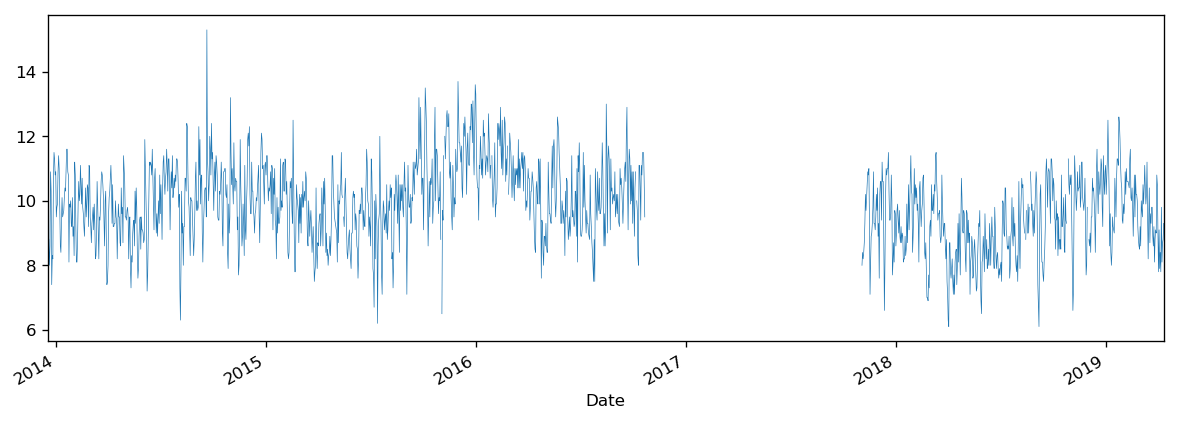

In [19]:
plt.style.use('default')
fig, axs = plt.subplots(figsize=(12,4), dpi=120)
a['Tmin'].plot(ax=axs, linewidth=.4)

In [20]:
a

,Tmean,Tmax,Tmin,Humidity,Rainfall,Presion,WV,WD
Date,,,,,,,,
2013-12-17,12.26,15.6,10.5,75.88,8.2,720.38,0.29,309
2013-12-18,12.50,17.1,8.9,71.88,0.0,720.01,0.80,68
2013-12-19,10.50,12.5,8.8,83.17,0.7,719.73,0.34,41
2013-12-20,9.81,11.7,8.0,95.25,0.1,718.88,0.27,41
2013-12-21,12.64,15.9,8.6,66.88,0.0,719.24,0.60,46
2013-12-22,15.18,20.2,10.9,29.38,0.0,720.57,1.38,26
2013-12-23,13.44,17.8,10.3,34.25,0.0,720.47,0.93,70
2013-12-24,12.24,15.8,7.4,35.42,0.0,719.89,0.56,86
2013-12-25,11.27,16.3,8.3,59.92,2.1,719.66,0.81,107


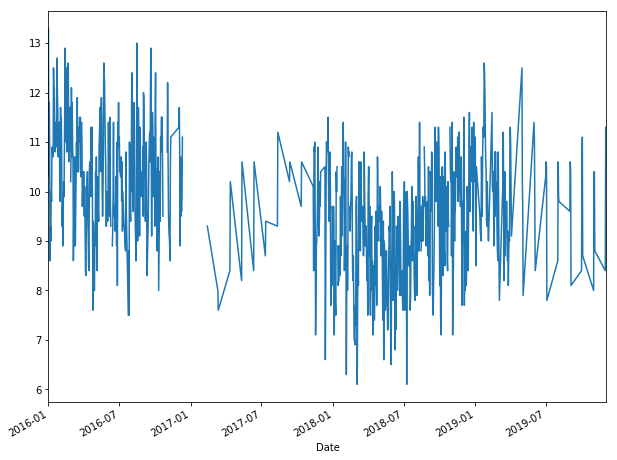

In [5]:
a['Tmin'].plot(figsize=(10,8))

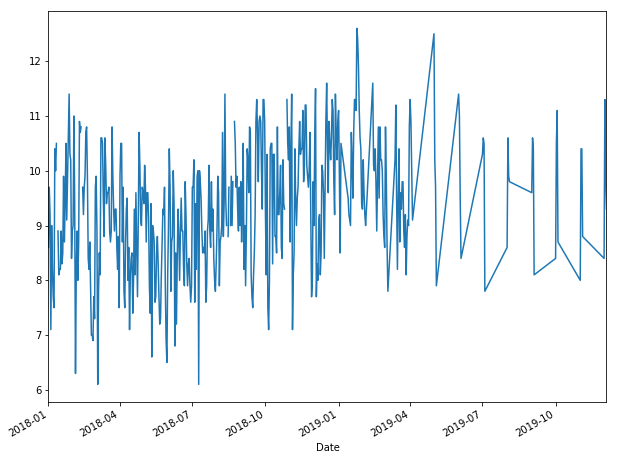

In [16]:
a['Tmin'].plot(figsize=(10,8))

In [30]:
b = a.convert_objects(convert_numeric=True)

/media/carlos/DATA/anaconda3/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


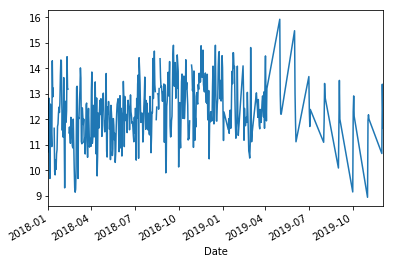

In [33]:
b['Tmean'].plot()

In [27]:
a.iloc[0,1]

'17'

In [28]:
a

,Tmean,Tmax,Tmin,Humidity,Rainfall,Presion,WV,WD
Date,,,,,,,,
2018-01-01,10.73,17,8.6,78.17,0,721.53,.47,105
2018-02-01,11.3,17,9,66.75,0,721.55,.65,129
2018-03-01,13.25,18.6,9.7,43.67,0,720.64,1.02,209
2018-04-01,13.13,17.3,9.9,34.04,0,720.76,1.07,4
2018-05-01,11.89,17,9.4,57.67,0,721.32,.6,147
2018-06-01,10.88,17,9,84.54,0,721.38,.48,150
2018-07-01,11.46,17,9.7,84.42,.1,721.15,.43,153
2018-08-01,11.39,17,8.9,86.25,0,720.57,.44,359
2018-09-01,11.1,17,8.7,70.63,1.9,719.9,.45,166


In [ ]:
b = pd.ExcelWriter('hola.xls')
b.s

In [165]:
a['Date'] = pd.to_datetime(a['Día/mes/año'])

In [167]:
a.set_index('Date', inplace=True)

In [169]:
a = a.drop('Día/mes/año', 1)

In [178]:
writer=pd.ExcelWriter('holi.xlsx')

In [179]:
#writer = pd.ExcelWriter('Pandas-Example2.xlsx')
a.to_excel(writer,'Sheet1',index=True)
writer.save()

In [168]:
a.drop()

,Día/mes/año,Temperatura (°c),Temperatura (°c),Temperatura (°c),Humedad (%),Lluvia (mm),Presion (mb),VelocidaddelViento (m/s),DirecciondelViento
Date,,,,,,,,,
2013-12-17,17-12-2013,12.26,15.6,10.5,75.88,8.2,720.38,.29,309
2013-12-18,18-12-2013,12.5,17.1,8.9,71.88,0,720.01,.8,68
2013-12-19,19-12-2013,10.5,12.5,8.8,83.17,.7,719.73,.34,41
2013-12-20,20-12-2013,9.81,11.7,8,95.25,.1,718.88,.27,41
2013-12-21,21-12-2013,12.64,15.9,8.6,66.88,0,719.24,.6,46
2013-12-22,22-12-2013,15.18,20.2,10.9,29.38,0,720.57,1.38,26
2013-12-23,23-12-2013,13.44,17.8,10.3,34.25,0,720.47,.93,70
2013-12-24,24-12-2013,12.24,15.8,7.4,35.42,0,719.89,.56,86
2013-12-25,25-12-2013,11.27,16.3,8.3,59.92,2.1,719.66,.81,107


In [163]:
a

,Día/mes/año,Temperatura (°c),Temperatura (°c),Temperatura (°c),Humedad (%),Lluvia (mm),Presion (mb),VelocidaddelViento (m/s),DirecciondelViento
0,17-12-2013,12.26,15.6,10.5,75.88,8.2,720.38,.29,309
1,18-12-2013,12.5,17.1,8.9,71.88,0,720.01,.8,68
2,19-12-2013,10.5,12.5,8.8,83.17,.7,719.73,.34,41
3,20-12-2013,9.81,11.7,8,95.25,.1,718.88,.27,41
4,21-12-2013,12.64,15.9,8.6,66.88,0,719.24,.6,46
5,22-12-2013,15.18,20.2,10.9,29.38,0,720.57,1.38,26
6,23-12-2013,13.44,17.8,10.3,34.25,0,720.47,.93,70
7,24-12-2013,12.24,15.8,7.4,35.42,0,719.89,.56,86
8,25-12-2013,11.27,16.3,8.3,59.92,2.1,719.66,.81,107
9,26-12-2013,12.75,16.6,8.2,50.96,0,720.45,1.02,188


In [108]:
a1 = 'https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo02.php?estaciones=472CA750&tipo=SUT&CBOFiltro=201901&t_e=M'

In [109]:
a1

'https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo02.php?estaciones=472CA750&tipo=SUT&CBOFiltro=201901&t_e=M'

In [111]:
a==a1

True

In [ ]:
https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo02.php?estationes=472CA750&tipo=SUT&CBOFiltro=201901&t_e=M

In [89]:
URL_base='https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo02.php?'
stations='472CA750'
stype='SUT'
URL_post='estaciones=472CA750&tipo=SUT&CBOFiltro=201901&t_e=M'
URL=URL_base+URL_post
resp = requests.get(URL)
soup = BeautifulSoup(resp.content, 'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

In [90]:
df = pd.DataFrame(df.values[2:], columns=df.iloc[0])

In [84]:
df

,Día/mes/año,Temperatura (°c),Temperatura (°c),Temperatura (°c),Humedad (%),Lluvia (mm),Presion (mb),VelocidaddelViento (m/s),DirecciondelViento
0,01-01-2019,14.03,19.1,11.1,58.67,0,718.63,.92,162
1,02-01-2019,14.09,18.6,10.2,68.08,0,718.91,.89,45
2,03-01-2019,14.82,19.7,10.8,61.63,0,719.35,.9,222
3,04-01-2019,14.49,18.8,11.3,50.46,.8,720.91,.78,36
4,05-01-2019,15.93,19.6,12.5,41.75,0,721.87,.83,167
5,06-01-2019,15.48,20.5,11.4,44.13,0,721.42,.79,183
6,07-01-2019,13.68,17.7,10.3,46.08,0,721.11,.64,94
7,08-01-2019,11.1,14.6,8.6,72.13,1.7,721.66,.51,64
8,09-01-2019,10.09,12.1,9.6,98.13,6.6,721.11,.4,247
9,10-01-2019,9.15,9.8,8.4,NaN,14.3,720.2,.24,142


In [16]:
res = requests.get("http://www.nationmaster.com/country-info/stats/Media/Internet-users")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]
countries = df["COUNTRY"].tolist()
users = df["AMOUNT"].tolist()

In [43]:
URL='https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo.php?estaciones=000478'
resp= requests.get(URL)
html=resp.content
soup = BeautifulSoup(html,"lxml")

In [78]:
soup.prettify

<bound method Tag.prettify of <html>
<head>
<title>Senamhi - Ultimos Datos </title>
<!-- -->
<script language="JavaScript">
//            function dontsteal() {
//                if (event.button == 2) {
//                    alert('ï¿½Copyright 2006 - 2008 SENAMHI.');
//                }
//            }
//            document.onmousedown = dontsteal
        </script>
<script language="JavaScript">
            function MM_jumpMenu(targ, selObj, restore) { //v3.0
                eval(targ + ".location='" + selObj.options[selObj.selectedIndex].value + "'");
                //if (restore) selObj.selectedIndex=0;
            }
            //onChange="MM_jumpMenu('parent.frames[\'CONTENEDOR\']',this,1)"
        </script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>
<style type="text/css">
        body{
            margin:0px;
            padding:0px;
        }
        .body01 {  font-family: Arial, Helvetica, sans-serif; font-size: 10px; text-align: centre; f

In [79]:
for link in soup.find_all('iframe'):
    #print(link)
    print(link.get('src'))

_dat_esta_tipo02.php?estaciones=000478&tipo=CON&CBOFiltro=201903&t_e=M


In [42]:
option_tags = soup.find_all("tr" , attrs={'aling' : 'center'})
for a in option_tags:
    print(a.find('div').text)

Estación : PUERTO INCA , Tipo Convencional - Meteorológica 
Departamento : 
Latitud : 


In [30]:
option_tags

[<tr aling="center" bgcolor="#003366">
 <td bgcolor="#666666" colspan="7">
 <div align="center"><b><font color="#F4F4F4">Estación : PUERTO INCA , Tipo Convencional - Meteorológica </font></b></div> </td>
 </tr>, <tr aling="center">
 <td><div align="right">Departamento : </div></td>
 <td>HUANUCO</td>
 <td><div align="right">Provincia : </div></td>
 <td>PUERTO INCA</td>
 <td><div align="right">Distrito : </div></td>
 <td>PUERTO INCA</td>
 <td><div align="center">
                             Ir : <select class="dire" id="CBOFiltro" name="CBOFiltro" onchange="javascript:submit()"><option selected="" value="201404">2014-04</option>
 <option selected="" value="201405">2014-05</option>
 <option selected="" value="201406">2014-06</option>
 <option selected="" value="201407">2014-07</option>
 <option selected="" value="201408">2014-08</option>
 <option selected="" value="201409">2014-09</option>
 <option selected="" value="201410">2014-10</option>
 <option selected="" value="201411">2014-11</o

In [28]:
soup

<html>
<head>
<title>Senamhi - Ultimos Datos </title>
<!-- -->
<script language="JavaScript">
//            function dontsteal() {
//                if (event.button == 2) {
//                    alert('ï¿½Copyright 2006 - 2008 SENAMHI.');
//                }
//            }
//            document.onmousedown = dontsteal
        </script>
<script language="JavaScript">
            function MM_jumpMenu(targ, selObj, restore) { //v3.0
                eval(targ + ".location='" + selObj.options[selObj.selectedIndex].value + "'");
                //if (restore) selObj.selectedIndex=0;
            }
            //onChange="MM_jumpMenu('parent.frames[\'CONTENEDOR\']',this,1)"
        </script>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
</head>
<style type="text/css">
        body{
            margin:0px;
            padding:0px;
        }
        .body01 {  font-family: Arial, Helvetica, sans-serif; font-size: 10px; text-align: centre; font-weight: bold; color: #072C

In [2]:
URL_base='https://www.senamhi.gob.pe/mapas/mapa-estaciones/_dat_esta_tipo02.php?'
URL_post='estaciones=472CA750&tipo=SUT&CBOFiltro=201902&t_e=M'
URL=URL_base+URL_post
resp = requests.get(URL)
html = resp.content
soup = BeautifulSoup(html,"lxml")

In [4]:
option_tags = soup.find_all("tr" , attrs={'aling' : 'center'})

In [8]:
option_tags

[<tr aling="center" bgcolor="#003366">
 <td bgcolor="#666666" rowspan="2"><div align="center"><b><font color="#F4F4F4">Día/mes/año</font></b></div></td>
 <td bgcolor="#A0A0A0" colspan="3"><div align="center"><b><font color="#F4F4F4">Temperatura (°c)<br/> </font></b></div></td>
 <td bgcolor="#A0A0A0" rowspan="2"><div align="center"><b><font color="#F4F4F4">Humedad (%)</font></b> </div></td>
 <td bgcolor="#A0A0A0" rowspan="2"><div align="center"><b><font color="#F4F4F4">Lluvia (mm)<br/> </font></b></div></td>
 <td bgcolor="#A0A0A0" rowspan="2"><div align="center"><b><font color="#F4F4F4">Presion (mb)</font></b></div></td>
 <td bgcolor="#A0A0A0" rowspan="2"><div align="center"><b><font color="#F4F4F4">Velocidad<br/>del<br/>Viento (m/s)</font></b></div> </td>
 <td bgcolor="#A0A0A0" rowspan="2"><div align="center"><b><font color="#F4F4F4">Direccion<br/>del<br/>Viento</font></b></div></td>
 </tr>, <tr aling="center" bgcolor="#003366">
 <td bgcolor="#A0A0A0"><div align="center"><b><font color

In [7]:
option_tags
for a in option_tags:
    print(a.find('div').text)

Día/mes/año
Prom
01-02-2019
02-02-2019
03-02-2019
04-02-2019
05-02-2019
06-02-2019
07-02-2019
08-02-2019
09-02-2019
10-02-2019
11-02-2019
12-02-2019
13-02-2019
14-02-2019
15-02-2019
16-02-2019
17-02-2019
18-02-2019
19-02-2019
20-02-2019
21-02-2019
22-02-2019
23-02-2019
24-02-2019
25-02-2019
26-02-2019
27-02-2019
28-02-2019
